# Supplementary Information for:  
# Physiological mismatches between life-history traits shape the temperature dependence of arthropod fitness

<a class="tocSkip">

In [52]:
#Load some modules etc
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault) # Reset plots to default style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.grid'] = 'true'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['grid.alpha'] = .45
# plt.rcParams['axes.xmargin'] = 0
# plt.rcParams['axes.xmargin'] = 0
plt.rcParams['figure.figsize'] = [10/2.54, 8/2.54]

from sympy import *
import scipy as sc
import numpy as np
init_printing()
%matplotlib inline

## Model for arthropod maximum population growth rate (fitness)

In age-structured populations, the expected reproductive success of an individual can be described using the continuous form of the Euler-Lotka equation:
$$
	\int\limits_{\alpha}^\infty \mathrm{e}^{-r_m x}l_{x}b_{x}\, \mathrm{d}x = 1
$$
where $r_m$ is the maximal population growth rate, $a$ is the age of first reproduction, $l_x$ is the age-specific survivorship, and $b_x$ is the age-specific fecundity. Solving this equation gives $r_m$ as a function of life-history parameters (the life-history traits).

In [53]:
x, l_a, b_max, alpha, z, z_J, kappa, T, M_0, K, t = var('x l_a b_max alpha z z_J kappa T M_0 K t',real=True, positive = true) #assign symbolic variables

r_m  = var('r_m', real = True) # r_m can be negative

Because a Type III survivorship curve within life stages (which assumes a constant mortality rate) is a resonable approximation for arthropods ([Amarasekare and Savage, 2012](http://www.ncbi.nlm.nih.gov/pubmed/22218308)), given an instantaneous mortality rate, $z$, age-specific survivorship, $l_x$, declines exponentially with age and can be modeled as:

\begin{equation} 
	l_x = l_{\alpha}\mathrm{e}^{-z(x-\alpha)}
\end{equation}

Here, $l_\alpha$ is the proportion of eggs surviving to adulthood (age $\alpha$), which, assuming a fixed instantaneous mortality rate across all juvenile stage, $z_J$, can be modelled as:
\begin{equation}
	l_\alpha = \mathrm{e}^{-\int\limits_0^\alpha z_J\, \mathrm{d}x} = 
	\mathrm{e}^{-z_J \alpha}
\end{equation}

In [54]:
l_a = exp(-integrate(z_J,(x,0,alpha))); l_a

This, when substituted into the $l_x$ equation then gives

\begin{equation}
	l_x = \mathrm{e}^{-(z_J \alpha + z(x-\alpha))}
\end{equation}

<!-- This model can be easily adapted for a variable mortality rate, for example due to senescence, often modelled using a gompertz equation. -->

In [55]:
l_x = l_a * exp(-z*(x - alpha)); simplify(l_x)

(where $x \ge \alpha $).

Next, age-specific fecundity $b_x$ is expected to reach a peak, $b_{max}$, shortly after maturation and then decline gradually with age. We model this using an exponential function
$$
	b_{x} = b_{max} \mathrm{e}^{\kappa \left(\alpha - x\right)}
$$

where we assume that fecundity peaks at the age of first reproduction, which occurs immediately at the time of adult emergence ($\alpha$), and $\kappa$ is a shape parameter (the fecundity loss rate in day$^{-1}$) that controls the spread of the fecundity schedule, that is, the rate of decline in fecundity after its peak. It is also possible that there is a systematic temperature-dependence of the delay between $\alpha$ and the age of peak fecundity. This can be modelled using a shifted exponential or gompertz equation, but is outside the scope of the current study. The figures below show the shape of the $b_x$ model.

In [56]:
b_x = b_max * exp(-kappa*(x - alpha)); simplify(b_x)

We can now visualize these functions.

In [57]:
#assign parameter values

z_J_par = .05 #1/day
z_par = .03 #1/day
alp_par = 25. #days
b_max_par = 1. #individuals/(individual * day)
kap_par = .1 #1/day

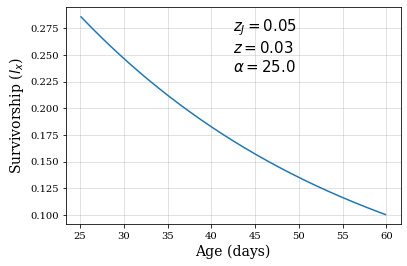

In [58]:
#Numerically evaluate
x_vec = np.arange(0, 60, 0.1) #vector of ages

l_x_lam = lambdify((z_J, z, alpha,x), l_x, np) # Use lambidfy to speed up
l_x_vec = l_x_lam(z_J_par, z_par, alp_par, x_vec[x_vec>alp_par])

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(x_vec[x_vec>alp_par], l_x_vec)
ax.set_xlabel('Age (days)', fontsize=14)
ax.set_ylabel('Survivorship ($l_x$)', fontsize=14)
ax.text(sc.mean(x_vec[x_vec>alp_par]), sc.amax(l_x_vec), 
        '$z_J = ' + str(z_J_par)+'$ \n' + 
        '$z = ' + str(z_par)+'$ \n' + 
        r'$\alpha = ' + str(alp_par)+'$ \n',
        horizontalalignment='left', verticalalignment='top', fontsize=15)

plt.savefig('../results/lxModel.pdf', bbox_inches='tight')

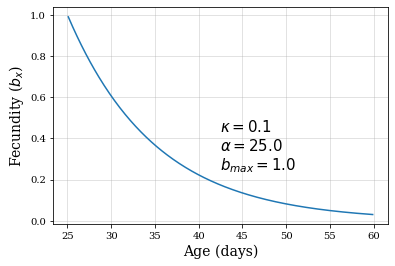

In [59]:
fig = plt.figure(); ax = fig.add_subplot(111)
b_x_lam = lambdify((b_max, kappa, alpha, x), b_x, np) #use lambidy to speed up
b_x_vec = b_x_lam(b_max_par, kap_par, alp_par, x_vec[x_vec>alp_par])

ax.plot(x_vec[x_vec>alp_par], b_x_vec);
ax.set_xlabel('Age (days)', fontsize=14); 
ax.set_ylabel('Fecundity ($b_x$)', fontsize=14)
ax.text(sc.mean(x_vec[x_vec>alp_par]), sc.amax(b_x_vec)/2, 
        r'$\kappa = ' + str(kap_par)+'$ \n'+ 
        r'$\alpha = ' + str(alp_par)+'$ \n' +
        r'$b_{max} = ' + str(b_max_par)+'$ \n',
        horizontalalignment='left', verticalalignment='top', fontsize=15)

plt.savefig('../results/bxModel.pdf')

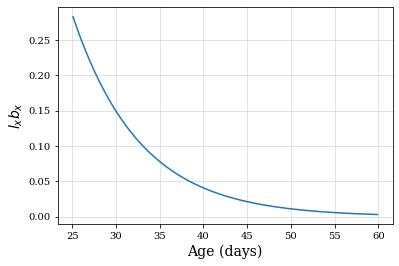

In [60]:
fig = plt.figure(); ax = fig.add_subplot(111) #now plot lxmx

ax.plot(x_vec[x_vec>alp_par], b_x_vec*l_x_vec);
ax.set_xlabel('Age (days)', fontsize=14); 
ax.set_ylabel('$l_x b_x$', fontsize=14)

plt.savefig('../results/lxbxModel.pdf', bbox_inches='tight')

Next, substituting the $l_x$ and $b_x$ models into the Euler-Lotka Equation, we get

$$	
\int\limits_{\alpha}^\infty b_{max} \mathrm{e}^{- \alpha z_{J} + \kappa \left(\alpha - x\right) - r x + z \left(\alpha - x\right)}\, \mathrm{d}x = 1
$$

i.e., 
$$
b_{max}\mathrm{e}^{- \alpha z_J} 
\int\limits_{\alpha}^\infty \mathrm{e}^{- r x + (\kappa + z) (\alpha - x)}\, \mathrm{d}x = 1
$$

In [61]:
EuLo = exp(-r_m * x) * l_x * b_x; simplify(EuLo)

And evaluating the integral produces after simplification:

\begin{equation}
    \frac{b_{max} e^{- \alpha \left(r + z_{J}\right)}}{\kappa + r + z} = 1
\end{equation}

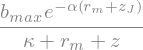

In [62]:
# Integrate EuLo (sagemath used to integrate(EuLo, x, alpha, infinity), with positivity constraints on all parameters), which gives:
EuLo_int = b_max*exp(-alpha*z_J)/((kappa + r_m)*exp(alpha*r_m) + z*exp(alpha*r_m)); simplify(EuLo_int)

Solving this for $r_m$ gives:

\begin{equation}
r_m = \frac{1}{\alpha} \left(- \alpha (\kappa + z) + \operatorname{LambertW}{\left(\alpha b_{max} e^{\alpha \left(\kappa + z - z_{J}\right)} \right)}\right)
\end{equation}

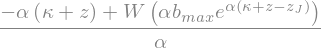

In [63]:
r_SP = solve(EuLo_int-1,r_m); r_SP = simplify(r_SP[0]); r_SP

The LambertW function part is difficult to use for parameter sensitivity analyses (and also hard to interpret). An approximation for its main (real) branch can be found, but it involves a double logarithm, which still results in divergence of certain analyses (below). Therefore instead, we directly derive an approximation to the solution of the integral above, as follows. 

First, we take a log of both sides of the equation:

\begin{equation}
    \log(b_{max}) - \alpha (r + z_J) - \log(\kappa + r + z) = 0
\end{equation}

As such, this equation still cannot be solved for $r_m$ because of the term $\mathrm{ln}(\kappa + r + z)$. But we can approximate just this term by performing a power series expansion of it around $r_m = 0$:

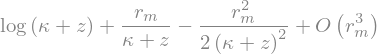

In [64]:
series(ln(r_m + kappa + z),r_m, 0,3)

That is, 

$$
 \frac{b_{max} e^{- \alpha z_{J}}}{z e^{\alpha r_m} + \left(\kappa + r_m\right) e^{\alpha r_m}}
 \approx \log{\left (\kappa + z \right )} + \frac{r_m}{\kappa + z} - \frac{r_m^{2}}{2 \kappa^{2} + 4 \kappa z + 2 z^{2}} + \mathcal{O}\left(r_m^{3}\right)
$$

Then, substituting the first two terms back into the integral solution and solving for $r_m$ gives:

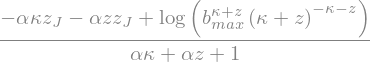

In [65]:
EuLo_int_app = b_max*exp(-alpha*(r_m + z_J))/ exp(log(kappa + z) + r_m/(kappa + z))

r_SP_app = solve(EuLo_int_app-1, r_m); r_SP_app = simplify(r_SP_app[0]); r_SP_app

Thus the approximation is: 

$$
	r_m \approx \frac{-\alpha \kappa z_J - \alpha z z_J + \kappa \log{\left (\frac{b_{max}}{\kappa + z} \right )} + z \log{\left (\frac{b_{max}}{\kappa + z} \right )}}{\alpha (\kappa + z) + 1}  
$$

that is, 

$$r_m \approx \frac{(\kappa + z)  \left( \log\left(\frac{b_{max}}{\kappa + z} \right) - \alpha z_J\right)}{\alpha (\kappa + z) + 1} $$

The figures below show that this approximation is very good as long as $r_m$ is relatively small (approx. $<0.5$). This range of $r_m$ values is typically where maximal growth rates of arthropods typically lie ([Frazier et al 2006](https://www.journals.uchicago.edu/doi/full/10.1086/506977)).

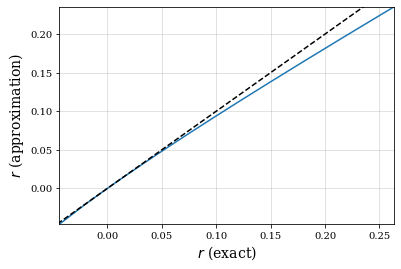

In [66]:
from scipy.special import lambertw

bmax_vec = np.arange(.1, 1000, 0.1).astype(float) #vector of b_max's

#use lambidy to speed up:
r_SP_app_lam = lambdify((b_max, z_J, z, kappa, alpha), r_SP_app, np)
r_SP_app_vec = r_SP_app_lam(bmax_vec, z_J_par, z_par, kap_par, alp_par)

# Specify r_SP with lambertw:
tmp = lambertw((alp_par*bmax_vec*exp(alp_par*(kap_par + z_par - z_J_par))).astype('float')).real
r_SP_vec = -(kap_par + z_par) + tmp/alp_par

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(r_SP_vec, r_SP_app_vec)
ax.plot(np.arange(-1,5,0.1), np.arange(-1,5,0.1), "k--")
ax.set_xlim([min(r_SP_vec),max(r_SP_vec)])
ax.set_ylim([min(r_SP_app_vec),max(r_SP_app_vec)])
ax.set_xlabel('$r$ (exact)', fontsize=14); 
ax.set_ylabel('$r$ (approximation)', fontsize=14)

plt.savefig('../results/rapprox0.pdf', bbox_inches='tight')

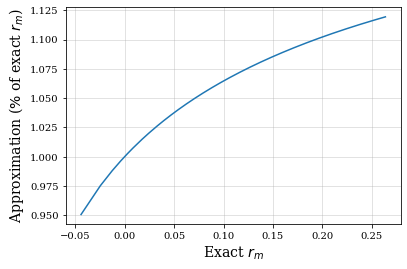

In [67]:
fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(r_SP_vec, r_SP_vec/r_SP_app_vec)
ax.set_xlabel('Exact $r_m$', fontsize=14) 
ax.set_ylabel(r'Approximation ($\%$ of exact $r_m$)', fontsize=14)

plt.savefig('../results/rapprox1.pdf', bbox_inches='tight')

The parameters underlying ($r_m$) fitness and their units are summarized in the following table:

| **Parameter**| **Units** | **Description** |
|-------------|-----------|-----------------|
| $a$ | day | Age of maturation (egg to adult development time)|
|$b_{max}$ | individuals (eggs) $\times$ individual (female) $\times$ day $^{-1}$ , i.e., day$^{-1}$ | Maximum fecundity (reproductive rate)|
|$z$ | day$^{-1}$ | Adult mortality rate |
|$z_J$ | day$^{-1}$ | Mortality rate across all juvenile stages |
|$\kappa$ | day$^{-1}$ | Fecundity loss rate|


## Temperature-dependence (TPCs) of life history traits 

We describe the thermal performance curve for each life history parameter using the Sharpe-Schoolfield model, or its inverse: 

In [68]:
B_0, E, E_D, T_pk, k, T, T_ref = var('B_0 E E_D T_pk k T T_ref') # Assign symbolic variables

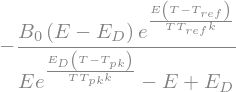

In [69]:
B = B_0 * exp(-E * ((1/(k*(T))) - (1/(k*T_ref)))) /(1 + (E / (E_D - E)) * exp((E_D / k)* ((1/T_pk) - (1/T)))); simplify(B)

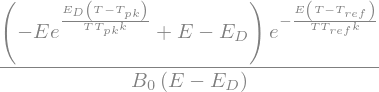

In [70]:
B_inv = simplify(1/B); B_inv

The Sharpe-Schoolfield equation assumes thermodyanmic constraints on a single rate-limiting enzyme governing the metabolic rates underlying the thermal performance curves of life history traits. It therefore provides a mechanistic basis for the hotter-is-better pattern commonly observed in empirical analyses. The parameters of the model are decribed in the main text. One key point to note here is that the constant $B_0$ implicitly includes the effect of body size scaling. That is, $B_0$ can actually be written as:

$$B_0 = B'_0 m^\psi,$$

Where $m$ is the body mass of the organism, $\psi$ a scaling exponent determined by fundamental biophysical constraints on individual-level metabolic rate imposed by body size ([West et al 1997](http://www.ncbi.nlm.nih.gov/pubmed/9082983); [Gillooly et al 2002](https://www.nature.com/articles/417070a)), and $B'_0$ is a size- and temperature-independent constant. This constant can in fact change with thermal adaptation or acclimation. In particular, chronically cooler temperatures are expected to select for an elevation of the $B'_0$ of respiration rate (Angilletta 2009)[https://www.google.co.uk/books/edition/Thermal_Adaptation/yrvqlaHdRZIC?hl=en&gbpv=0] (and therefore elevate or depress the analogous normalisation constant of different life-history traits - see below), and chronically warmer temperatures may select for a lowering of $B'_0$ of respiration rate. Here we assume that the effects of such changes in $B'_0$ on the temperature-depndence of population fitness, through changes in the $B_0$ of life history traits, will be small compared to the effect of changes in body mass (scaling) component itself. To account for the latter, we size-correct our empirically estimated values for $r_m$ (Main text; SI Section xx). However, the potential effects of adaptive or acclimatory changes $B'_0$ merit a thorough investigation in future work by extending our theoretical framework. 

Furthermore, recent work by [Kordal et al 2022](https://assets.researchsquare.com/files/rs-900406/v1/e71d22c6-95f1-4411-aec9-44d8af635301.pdf?c=1632838506) shows that both $E$ and $\psi$ or respiration rates in aquatic stages of insects too change significantly with chronic expsure to warmer or cooler temperatures. While this will not change our results qualitatively (i.e., it will change the predicted strengths of thermal selection on traits, but not their ranking), this also merits further investigation in future work.

### TPC parameterizations

We parameterise the Sharpe-Schoolfield equation for the different life-history traits using a set of values lying within empirically feasible ranges ([Dell et al 2011](https://www.pnas.org/doi/10.1073/pnas.1015178108)) (Table below). 

|**Life history trait** | **Normalization constant ($B_0$)** | **Temperature of peak performance ($T_{pk}$)** | **Thermal Sensitivity ($E$)** | **Life history trait ($E_D$)** |
|----------------------|----------------------|----------------------|----------------------|-----------------|
|$\alpha$ | 25 | 0-35 | 0.6 | 4 |
|$b_{max}$ | 1 | 0-35 | 0.6 | 4 |
|$z$ | 0.03 | 0-35 | 0.6 | 4 |
|$z_J$ | 0.05 | 0-35 | 0.6 | 4 |
|$\kappa$ | 0-1 | 0-35 | 0.6 | 4 |

Because all five life histroy traits are ultimateky governed by metabolic rate, we assume that they all have the same thermal sensitivity ($E$) and deactivation energy ($E_D$), consistent with the median values found in our empirical data (see main text; SI section xx). These values are also broadly consistent with the results of [Dell *et al.* 2011](https://www.pnas.org/doi/10.1073/pnas.1015178108). The parameter values for $B_0$ were varied with type of trait, fixing them to be the median values observed in our empirical dataset (see main text; SI section xx). In the absence of appropriate data on the rate of loss of fertility ($\kappa$), we evaluate the model for a range of values (below; Section xx). The values of trait $T_{pk}$'s were varied relative to $25^\circ$C (see below), which is the approximate median of the values observed in thge data (SI section xx).

In [71]:
k_par = 8.617 * 10**-5
E_par = .6
E_D_par = 4
T_pk_par = 25
T_ref_par = 10+273.15
B_0_par = 1

T_vec = 273.15+np.arange(0, 40, 0.05) #Vector of temperatures

#Generate some illustrative curves:

B_lam = lambdify((B_0, E, T_pk, T_ref, E_D,k,T), B, np) 
B_vec0 = B_lam(B_0_par,E_par,T_pk_par-5+273.15,T_ref_par,E_D_par,k_par,T_vec)
B_vec1 = B_lam(B_0_par,E_par,T_pk_par+273.15,T_ref_par,E_D_par,k_par,T_vec)
B_vec2 = B_lam(B_0_par,E_par,T_pk_par+5+273.15,T_ref_par,E_D_par,k_par,T_vec)

B_inv_lam = lambdify((B_0, E, T_pk, T_ref, E_D,k,T), B_inv, np)
B_inv_vec0 = B_inv_lam(1/B_0_par,E_par,T_pk_par-5+273.15,T_ref_par,E_D_par,k_par,T_vec) #inverse because we are using inverse of the S-S TPC model
B_inv_vec1 = B_inv_lam(1/B_0_par,E_par,T_pk_par+273.15,T_ref_par,E_D_par,k_par,T_vec)
B_inv_vec2 = B_inv_lam(1/B_0_par,E_par,T_pk_par+5+273.15,T_ref_par,E_D_par,k_par,T_vec)

#Assign trait-specific TPC values:

B_0_alp =  1/alp_par#days; inverse because we are using inverse of the Sharpe-Schoolfield model
T_pk_alp = T_pk_par
E_alp = E_par
E_D_alp = E_D_par

B_0_bmax = b_max_par #individuals/(individual * day)
T_pk_bmax = T_pk_par
E_bmax = E_par
E_D_bmax = E_D_par

B_0_z = 1/z_par  #1/day; inverse because we are using inverse of the S-S TPC model
T_pk_z = T_pk_par
E_z = E_par
E_D_z = E_D_par

B_0_zJ = 1/z_J_par  #1/day; inverse because we are using inverse of the S-S TPC model
T_pk_zJ = T_pk_par
E_zJ = E_par
E_D_zJ = E_D_par

B_0_kap = kap_par #1/day
T_pk_kap = T_pk_par
E_kap = E_par
E_D_kap = E_D_par

#Calculate the trait TPCs for 3 temperatures

alp_vec0 = B_inv_lam(B_0_alp,E_alp,T_pk_alp-5+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec0 = B_lam(B_0_bmax,E_bmax,T_pk_bmax-5+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec0 = B_inv_lam(B_0_z,E_z,T_pk_z-5+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec0 = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ-5+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec0 = B_lam(B_0_kap,E_kap,T_pk_kap-5+273.15,T_ref_par,E_D_kap,k_par,T_vec)

alp_vec1 = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec1 = B_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec1 = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec1 = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec1 = B_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

alp_vec2 = B_inv_lam(B_0_alp,E_alp,T_pk_alp+5+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec2 = B_lam(B_0_bmax,E_bmax,T_pk_bmax+5+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec2 = B_inv_lam(B_0_z,E_z,T_pk_z+5+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec2 = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+5+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec2 = B_lam(B_0_kap,E_kap,T_pk_kap+5+273.15,T_ref_par,E_D_kap,k_par,T_vec)

## Temperature Dependence of $r_m$

To determine the temperature dependence of maximum population growth rate, we can substitute the thermal performance curves of the life history traits into the equation for $r_m$ derived above.

In [72]:
#Calculate r_m
r_m_vec0 = r_SP_app_lam(bmax_vec0, zJ_vec0, z_vec0, kap_vec0, alp_vec0)
r_m_vec1 = r_SP_app_lam(bmax_vec1, zJ_vec1, z_vec1, kap_vec1, alp_vec1)
r_m_vec2 = r_SP_app_lam(bmax_vec2, zJ_vec2, z_vec2, kap_vec2, alp_vec2)

### Trait sensitivity analysis

We now determine how TPC's of the different traits influence the predicted temperature-dependence of maximum population growth rate ($r_m$). This will also guide our subsequent calculation of thermal selection gradients for traits. For this sensitivity analysis, we use the chain rule, which allows us to write the thermal sensitivity of $r_m$ in terms of the sums of the product of the partial derivative of $r_m$ with respect to a trait and the derivative of that trait with respect to temperature:

\begin{equation}
    \frac{\mathrm{d}r_m}{\mathrm{d}T} = 
    \frac{\partial r_m}{\partial b_{max}} \frac{\mathrm{d}b_{max}}{\mathrm{d}T} + 
    \frac{\partial r_m}{\partial \alpha}\frac{\mathrm{d}\alpha}{\mathrm{d}T} + 
    \frac{\partial r_m}{\partial z} \frac{\mathrm{d}z}{\mathrm{d}T} +
    \frac{\partial r_m}{\partial z_J} \frac{\mathrm{d}z_J}{\mathrm{d}T} + 
    \frac{\partial r_m}{\partial \kappa} \frac{\mathrm{d}\kappa}{\mathrm{d}T} 
\end{equation}

Each summer term in the RHS of this equation quantifis the relative contribution of the TPC of a parameter/trait to the temperature dependence of  $r_m$. 

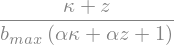

In [73]:
dr_dbmax = diff(r_SP_app, b_max); simplify(dr_dbmax)

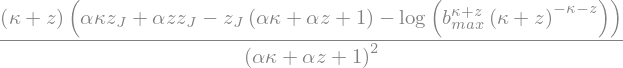

In [74]:
dr_dalp = diff(r_SP_app, alpha); simplify(dr_dalp)

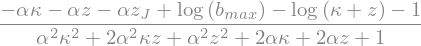

In [75]:
dr_dz = diff(r_SP_app, z); simplify(dr_dz)

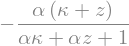

In [76]:
dr_dzJ = diff(r_SP_app, z_J); simplify(dr_dzJ)

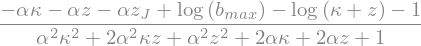

In [77]:
dr_dkap = diff(r_SP_app, kappa); simplify(dr_dkap)

For the TPC model, we ony need to calculate the derivative wrt $T$ for either the function $B$ (for parameters that are rates) or the 1/$B$ (for parameters that are times):

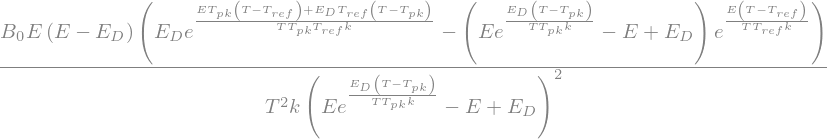

In [78]:
dBdT =  diff(B, T); simplify(dBdT)

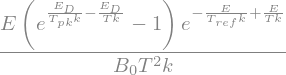

In [79]:
dB_invdT =  diff(B_inv, T); simplify(dB_invdT)

In [80]:
#Get the lambdified pd functions

dr_dalp_lam = lambdify((b_max, alpha, z, z_J, kappa), dr_dalp, np) # The dr_m / dTrait terms 
dr_dbmax_lam = lambdify((b_max, alpha, z, kappa), dr_dbmax, np)
dr_dz_lam = lambdify((b_max, alpha, z, z_J, kappa), dr_dz, np)
dr_dzJ_lam = lambdify((alpha, z, kappa), dr_dzJ, np)
dr_dkap_lam = lambdify((b_max, alpha, z, z_J, kappa), dr_dkap, np)

dalp_dT_lam = lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np) # The dTrait / dT terms
dbmax_dT_lam = lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dBdT, np)
dz_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np)   
dzJ_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np)
dkap_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dBdT, np)

# Numerically evaluate

dr_dalp_vec = dr_dalp_lam(bmax_vec1, alp_vec1, z_vec1, zJ_vec1, kap_vec1)
dr_dbmax_vec = dr_dbmax_lam(bmax_vec1, alp_vec1, z_vec1, kap_vec1)
dr_dz_vec = dr_dz_lam(bmax_vec1, alp_vec1, z_vec1, zJ_vec1, kap_vec1)
dr_dzJ_vec =  dr_dzJ_lam(alp_vec1, z_vec1, kap_vec1)
dr_dkap_vec = dr_dkap_lam(bmax_vec1, alp_vec1, z_vec1, zJ_vec1, kap_vec1)

dalp_dT_vec = dalp_dT_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
dbmax_dT_vec = dbmax_dT_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
dz_dT_vec =  dz_dT_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)  
dzJ_dT_vec =  dzJ_dT_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
dkap_dT_vec =  dkap_dT_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

# Calculate the parameter sensitivities
 
dr_dalp_dT_vec = dr_dalp_vec * dalp_dT_vec
dr_dbmax_dT_vec = dr_dbmax_vec * dbmax_dT_vec
dr_dz_dT_vec = dr_dz_vec * dz_dT_vec
dr_dzJ_dT_vec = dr_dzJ_vec * dzJ_dT_vec
dr_dkap_dT_vec = dr_dkap_vec * dkap_dT_vec

dr_dT_vec = dr_dbmax_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec

array([0.61522477, 0.38906824, 0.24777451, 1.        ])

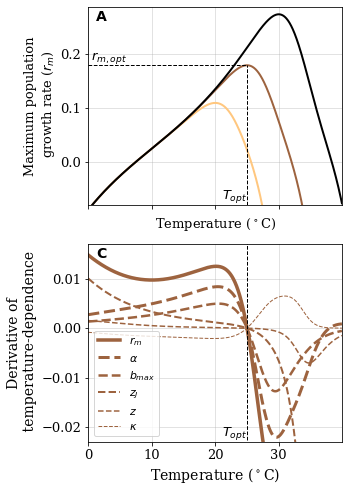

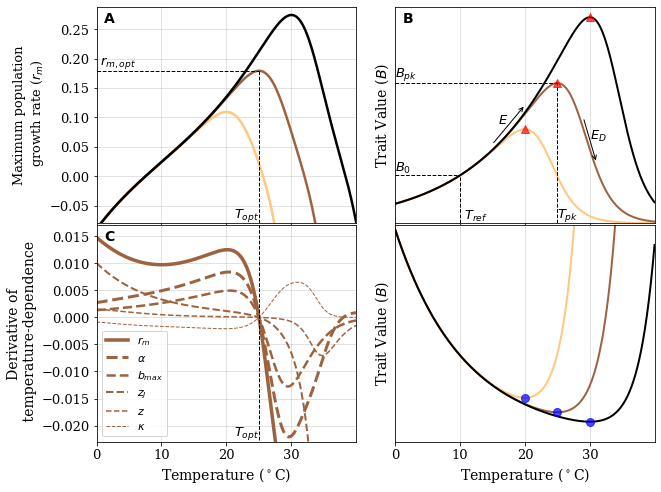

In [103]:
######### Fig 1 #############
fig = plt.figure(figsize=(10, 8)); 
cm = plt.cm.copper_r(np.linspace(0, 1, 3))
csfont = {'fontname':'DejaVu Sans'}

######## Plot r_m TPCs####### 

ax = fig.add_subplot(221)

ax.set_prop_cycle('color',cm)

ax.plot(T_vec-273.15, r_m_vec0, linewidth=2.5) 
ax.plot(T_vec-273.15, r_m_vec1, linewidth=2.5) 
ax.plot(T_vec-273.15, r_m_vec2, linewidth=2.5)

ax.plot([T_pk_par, T_pk_par], [-.08,max(r_m_vec1)], color='k', linestyle='--', linewidth=1)
ax.plot([0,T_pk_par], [max(r_m_vec1), max(r_m_vec1)], color='k', linestyle='--', linewidth=1)
ax.text(0+.5, max(r_m_vec1), '$r_{m,opt}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.set_title('A', weight="bold", fontsize=14, x=.05, y=.9,**csfont); 
ax.set_xlim(0,max(T_vec)-273.15); ax.set_ylim(-.08,max(r_m_vec2)*(1+0.05));
ax.text(T_pk_par, ax.get_ylim()[0], '$T_{opt}$',  horizontalalignment='right', verticalalignment='bottom', fontsize=13)
# ax.plot(T_vec-273.15, [0]*len(T_vec), color='k', linestyle='-.', linewidth=1);
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=13); 
ax.set_ylabel('Maximum population\n growth rate ($r_m$)', fontsize=13)
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);
ax.axes.xaxis.set_ticklabels([])

######## Plot results of sensitivity analysis#######

ax = fig.add_subplot(223)
ax.set_title('C', weight="bold", fontsize=14, x=.05, y=.9,**csfont); 

ax.plot(T_vec-273.15,dr_dT_vec, color=cm[1],linewidth=3.5, linestyle='-')
ax.plot(T_vec-273.15,dr_dalp_dT_vec, color=cm[1],linewidth=3, linestyle='--')
ax.plot(T_vec-273.15,dr_dbmax_dT_vec, color=cm[1],linewidth=2.5, linestyle='--')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, color=cm[1],linewidth=2, linestyle='--')
ax.plot(T_vec-273.15,dr_dz_dT_vec, color=cm[1],linewidth=1.5, linestyle='--')
ax.plot(T_vec-273.15,dr_dkap_dT_vec, color=cm[1],linewidth=1, linestyle='--')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim(0,max(T_vec)-273.15); ax.set_ylim(-0.023,0.017)
ax.text(T_pk_par, ax.get_ylim()[0], '$T_{opt}$',  horizontalalignment='right', verticalalignment='bottom', fontsize=13)
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('Derivative of\n temperature-dependence', fontsize=14);
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);
plt.legend([r'$r_m$', r'$\alpha$', '$b_{max}$', '$z_J$', '$z$', r'$\kappa$'], loc='lower left',fontsize=11) 

######## Plot illustrative SS TPCs####### 

ax = fig.add_subplot(222)
ax.set_prop_cycle('color',cm)
ax.plot(T_vec-273.15, B_vec0, linewidth=2) 
ax.plot(T_vec-273.15, B_vec1, linewidth=2) 
ax.plot(T_vec-273.15, B_vec2, linewidth=2)

E_arrow_ran = [15,20]; E_arrow_disp = 1.08
ax.annotate(s='', xy=(E_arrow_ran[0],B_vec1[sc.where(T_vec-273.15 == E_arrow_ran[0])[0][0]]*E_arrow_disp), 
            xytext=(E_arrow_ran[1],B_vec1[sc.where(T_vec-273.15 == E_arrow_ran[1])[0][0]]*E_arrow_disp), 
            arrowprops=dict(arrowstyle='<-'), horizontalalignment='left',verticalalignment='top')
ax.text(np.mean(E_arrow_ran),B_vec1[sc.where(T_vec-273.15 == np.mean(E_arrow_ran))[0][0]]*E_arrow_disp+.25, '$E$', 
        horizontalalignment='right', verticalalignment='top', fontsize=13)

E_D_arrow_ran = [29,31];E_D_arrow_disp = 1.12
ax.annotate(s='', xy=(E_D_arrow_ran[0],B_vec1[sc.where(T_vec-273.15 == E_D_arrow_ran[0])[0][0]]*E_D_arrow_disp), 
            xytext=(E_D_arrow_ran[1],B_vec1[sc.where(T_vec-273.15 == E_D_arrow_ran[1])[0][0]]*E_D_arrow_disp), 
            arrowprops=dict(arrowstyle='<-'), horizontalalignment='left',verticalalignment='top')
ax.text(np.mean(E_D_arrow_ran),B_vec1[sc.where(T_vec-273.15 == np.mean(E_D_arrow_ran))[0][0]]*E_D_arrow_disp+.25, '$E_D$', 
        horizontalalignment='left', verticalalignment='top', fontsize=13)

ax.plot([T_pk_par, T_pk_par], [0,max(B_vec1)], color='k', linestyle='--', linewidth=1)
ax.text(T_pk_par, 0, '$T_{pk}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.plot([0,T_pk_par], [max(B_vec1), max(B_vec1)], color='k', linestyle='--', linewidth=1)
ax.text(0, max(B_vec1), '$B_{pk}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.plot([0,10], [B_0_par, B_0_par], color='k', linestyle='--', linewidth=1)
ax.plot([10, 10], [0, B_0_par], color='k', linestyle='--', linewidth=1)
ax.text(0, B_0_par, '$B_0$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)
ax.text(10, 0, ' $T_{ref}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.plot(T_pk_par-5, max(B_vec0), marker='^', markersize=8, color="red",alpha = 0.7)
ax.plot(T_pk_par, max(B_vec1), marker='^', markersize=8, color="red",alpha = 0.7)
ax.plot(T_pk_par+5, max(B_vec2), marker='^', markersize=8, color="red",alpha = 0.7)

ax.set_title('B', weight="bold", fontsize=14, x=.05, y=.9,**csfont); 
ax.set_ylabel('Trait Value ($B$)', fontsize=14)
ax.tick_params(axis='x', labelsize=13);
ax.axes.get_yaxis().set_ticks([]) # because values are arbitrary 
ax.set_xlim(0,max(T_vec)-273.15); 
ax.set_ylim(0,)
ax.axes.xaxis.set_ticklabels([])

######## Plot illustrative inverse SS TPCs####### 

ax = fig.add_subplot(224)
ax.set_prop_cycle('color',cm)
ax.plot(T_vec-273.15, B_inv_vec0, linewidth=2)
ax.plot(T_vec-273.15, B_inv_vec1, linewidth=2)
ax.plot(T_vec-273.15, B_inv_vec2, linewidth=2)

ax.plot(T_pk_par-5, min(B_inv_vec0), marker='o', markersize=8, color="blue",alpha = 0.7)
ax.plot(T_pk_par, min(B_inv_vec1), marker='o', markersize=8, color="blue",alpha = 0.7)
ax.plot(T_pk_par+5, min(B_inv_vec2), marker='o', markersize=8, color="blue",alpha = 0.7)

ax.tick_params(axis='x', labelsize=13);
ax.set_ylabel('Trait Value ($B$)', fontsize=14)
ax.axes.get_yaxis().set_ticks([]) # because values are arbitrary 
ax.set_xlim(0,max(T_vec)-273.15); 
ax.set_ylim(0,2.5);
ax.axes.get_yaxis().set_ticks([])
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14);

plt.subplots_adjust(wspace = 0.15,hspace=.01)

plt.savefig('../results/r_TPC.pdf', bbox_inches='tight')

In **C**, the relative contribution of each trait's TPC to the temperature dependence of $r_m$ (i.e., $\frac{dr_m}{dT}$ - the black dash-dotted line) is the deviation of its (partial) derivative line from the $\frac{dr_m}{dT}$ line; greater the deviation, greater its contribution (and therefore sensitivity of $\frac{dr_m}{dT}$ to it). 

We can perform another type of trait sensitivity analysis (holding one trait to be temperature-independent at a time):

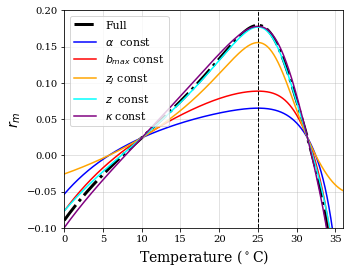

In [82]:
r_alp_cons_vec = r_SP_app_lam(bmax_vec1,zJ_vec1, z_vec1, kap_vec1, alp_par)
r_bmax_cons_vec = r_SP_app_lam(b_max_par,zJ_vec1, z_vec1, kap_vec1, alp_vec1)
r_z_cons_vec = r_SP_app_lam(bmax_vec1,zJ_vec1, z_par, kap_vec1, alp_vec1)
r_zJ_cons_vec = r_SP_app_lam(bmax_vec1,z_J_par, z_vec1, kap_vec1, alp_vec1)
r_kap_cons_vec = r_SP_app_lam(bmax_vec1,zJ_vec1, z_vec1, kap_par, alp_vec1)

############## Additional sesnitivity analysis figure #################

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()
# ax.set_title('B', weight="bold", fontsize=13, x=.05, y=.9,**csfont); 
ax.plot(T_vec-273.15,r_m_vec1, 'black',linewidth=3, linestyle='-.');
ax.plot(T_vec-273.15,r_alp_cons_vec, 'blue');
ax.plot(T_vec-273.15,r_bmax_cons_vec, 'red');
ax.plot(T_vec-273.15,r_zJ_cons_vec, 'orange');
ax.plot(T_vec-273.15,r_z_cons_vec, 'cyan');
ax.plot(T_vec-273.15,r_kap_cons_vec, 'purple');
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim(0,36)
ax.set_ylim(-0.1,.2)
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('$r_m$', fontsize=14);
plt.legend(['Full', r'$\alpha$  const', '$b_{max}$ const', '$z_J$ const', '$z$  const', r'$\kappa$ const'], loc='upper left',fontsize=11) 

plt.subplots_adjust(wspace=0.3)

plt.savefig('../results/r_sens.pdf', bbox_inches='tight')

Here the sensitivity of the thermal response of $r_m$ to a trait's TPC is the deviation of the line of that trait *away* from the full model (black dash-dotted) line. The vertical dashed line marks the optimal temperature ($T_{opt}$) for $r_m$ }.   

## Calculating the strength of selection on traits

In order to assess the impact of changes in the $T_{pk}$s of different traits and lifestages on population fitness, we re-calculate the temperature-dependence of $r_m$ (its TPC) with respect to changes in each of them, holding all others constant. We do not include $\kappa$ as a focal trait for this because it has the weakest influence on $r_m$ (previous section), and also because there are almost no data on its temperature dependence.

<lambdifygenerated-19>:2: RuntimeWarning: divide by zero encountered in log
  return ((-alpha*kappa*z_J - alpha*z*z_J + log(b_max**(kappa + z)*(kappa + z)**(-kappa - z)))/(alpha*kappa + alpha*z + 1))


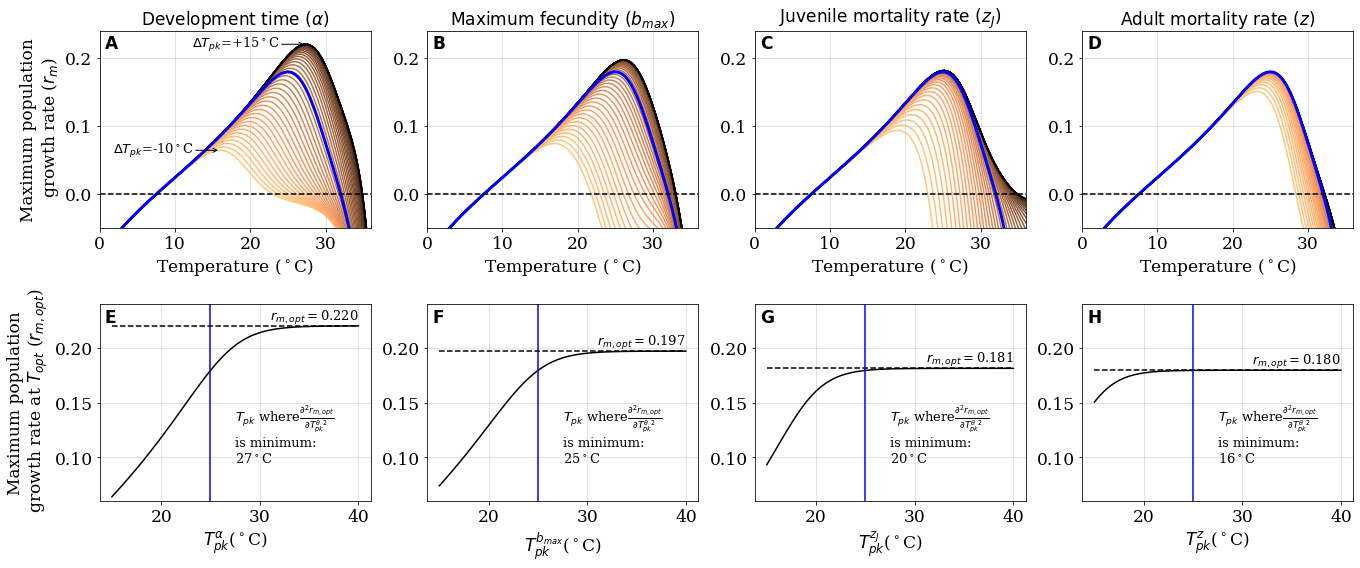

In [83]:
T_vec = 273.15+np.arange(0, 40, 0.05) #Vector of temperatures

alp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec = B_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec = B_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec, alp_vec)

T_pk_mm = T_pk_par + np.arange(-10,15.5,0.5) # new peaks
T_ref_mm = T_ref_par

############# Fig. 2 ###############
fntsiz = 17
fig = plt.figure(figsize=(19, 8))

#========== for alpha ==================
r_opt_vec = ["NA"]*len(T_pk_mm)

ax = fig.add_subplot(241)
ax.set_title('Development time '+r'($\alpha$)', fontsize=fntsiz, **csfont)
ax.text(0.02, 0.98, 'A', 
        horizontalalignment='left', verticalalignment='top', **csfont,
        fontsize=fntsiz, weight="bold", transform=ax.transAxes)
colormap = plt.cm.copper_r
cm = colormap(np.linspace(0, 1, len(T_pk_mm)))
ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):
    
    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec, alp_mm_tmp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))
    if i == min(range(len(T_pk_mm))):
        tmp_x1 = (T_vec-273.15)[sc.where(r_mm_tmp_vec == max(r_mm_tmp_vec))[0][0]]
        tmp_y1 = max(r_mm_tmp_vec)
        ax.annotate(s='', xy=(tmp_x1,tmp_y1), 
                    xytext=(tmp_x1-3.5,tmp_y1), arrowprops=dict(arrowstyle='->'))
        ax.text(tmp_x1-3.5,tmp_y1, r'$\Delta T_{pk}$='+"{:.0f}".format(T_pk_mm[0] - T_pk_par)+r'$^\circ$C', 
                horizontalalignment='right', verticalalignment='center', fontsize=fntsiz-4)
    elif i == max(range(len(T_pk_mm))) :
        tmp_x1 = (T_vec-273.15)[sc.where(r_mm_tmp_vec == max(r_mm_tmp_vec))[0][0]]
        tmp_y1 = max(r_mm_tmp_vec)
        ax.annotate(s='', xy=(tmp_x1,tmp_y1), 
                    xytext=(tmp_x1-3.5,tmp_y1), arrowprops=dict(arrowstyle='->'))
        ax.text(tmp_x1-3.5,tmp_y1, r'$\Delta T_{pk}$=+'+"{:.0f}".format(T_pk_mm[len(T_pk_mm)-1] - T_pk_par)+r'$^\circ$C', 
                horizontalalignment='right', verticalalignment='center', fontsize=fntsiz-4)

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--") # r_m = 0 line
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=fntsiz) 
ax.set_ylabel('Maximum population\n growth rate ($r_m$)', fontsize=fntsiz)
ax.set_ylim(-0.05,0.24)
ax.set_xlim(0,36)
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

ax = fig.add_subplot(245) # plot selection gradient
ax.text(0.02, 0.98, 'E', 
        horizontalalignment='left', verticalalignment='top', **csfont,
        fontsize=fntsiz, weight="bold", transform=ax.transAxes)
ax.plot(T_pk_mm, r_opt_vec, 'black')
ax.plot(T_pk_mm, [max(r_opt_vec)]*len(T_pk_mm), "k--") # max(r_m,opt) line
ax.set_ylim(0.06,.24)
ax.text(max(T_pk_mm),max(r_opt_vec), '$r_{m,opt}=$'+"{:.3f}".format(max(r_opt_vec)), 
                horizontalalignment='right', verticalalignment='bottom', fontsize=fntsiz-4)
ax.text(0.5,0.5, '$T_{pk}$ where' + r'$\frac{\partial^2 r_{m,opt}}{\partial {T_{pk}^\theta}^2}$'+'\nis minimum:\n'+
        "{:.0f}".format(T_pk_mm[np.where(np.gradient(np.gradient(r_opt_vec)) == min(np.gradient(np.gradient(r_opt_vec))))][0])+r'$^\circ$C', 
                horizontalalignment='left', verticalalignment='top', fontsize=fntsiz-4, transform=ax.transAxes) # where gradient starts to aymptote
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.set_xlabel(r'$T_{pk}^\alpha$($^\circ$C)', fontsize=fntsiz) 
ax.set_ylabel('Maximum population\n growth rate at $T_{opt}$ ($r_{m,opt}$)', fontsize=fntsiz)
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

# ========= For b_max ======================

r_opt_vec = ["NA"]*len(T_pk_mm)

ax = fig.add_subplot(242)
ax.set_title('Maximum fecundity'+ r' ($b_{max}$)', fontsize=fntsiz, **csfont)
ax.text(0.02, 0.98, 'B', 
        horizontalalignment='left', verticalalignment='top', **csfont,
        fontsize=fntsiz, weight="bold", transform=ax.transAxes)
ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):

    bmax_mm_tmp_vec = B_lam(B_0_bmax,E_bmax,T_pk_mm[i]+273.15,T_ref_mm,E_D_bmax,k_par,T_vec)
    r_mm_tmp_vec = r_SP_app_lam(bmax_mm_tmp_vec, zJ_vec, z_vec, kap_vec, alp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=fntsiz) 
ax.set_ylim(-0.05,0.24)
ax.set_xlim(0,36)
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

ax = fig.add_subplot(246)# plot selection gradient
ax.text(0.02, 0.98, 'F', 
        horizontalalignment='left', verticalalignment='top', **csfont,
        fontsize=fntsiz, weight="bold", transform=ax.transAxes)
ax.plot(T_pk_mm, r_opt_vec, 'black')
ax.plot(T_pk_mm, [max(r_opt_vec)]*len(T_pk_mm), "k--") # max(r_m,opt) line
ax.set_ylim(0.06,.24)
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.text(max(T_pk_mm),max(r_opt_vec), '$r_{m,opt}=$'+"{:.3f}".format(max(r_opt_vec)), 
                horizontalalignment='right', verticalalignment='bottom', fontsize=fntsiz-4)
ax.text(0.5,0.5, '$T_{pk}$ where' + r'$\frac{\partial^2 r_{m,opt}}{\partial {T_{pk}^\theta}^2}$'+'\nis minimum:\n'+
        "{:.0f}".format(T_pk_mm[np.where(np.gradient(np.gradient(r_opt_vec)) == min(np.gradient(np.gradient(r_opt_vec))))][0])+r'$^\circ$C', 
                horizontalalignment='left', verticalalignment='top', fontsize=fntsiz-4, transform=ax.transAxes) # where gradient starts to aymptote
ax.set_xlabel(r'$T_{pk}^{b_{max}}$($^\circ$C)', fontsize=fntsiz) 
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

# ========= For z_J ======================

r_opt_vec = ["NA"]*len(T_pk_mm)

ax = fig.add_subplot(2,4,3)
ax.set_title('Juvenile mortality rate'+ r' ($z_J$)', fontsize=fntsiz, **csfont)
ax.text(0.02, 0.98, 'C', 
        horizontalalignment='left', verticalalignment='top', **csfont,
        fontsize=fntsiz, weight="bold", transform=ax.transAxes)
ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):

    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec, zJ_mm_tmp_vec, z_vec, kap_vec, alp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=fntsiz) 
ax.set_ylim(-0.05,0.24)
ax.set_xlim(0,36)
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

ax = fig.add_subplot(2,4,7)# plot selection gradient
ax.text(0.02, 0.98, 'G', 
        horizontalalignment='left', verticalalignment='top', **csfont,
        fontsize=fntsiz, weight="bold", transform=ax.transAxes)
ax.plot(T_pk_mm, r_opt_vec, 'black')
ax.plot(T_pk_mm, [max(r_opt_vec)]*len(T_pk_mm), "k--") # max(r_m,opt) line
ax.set_ylim(0.06,.24)
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.text(max(T_pk_mm),max(r_opt_vec), '$r_{m,opt}=$'+"{:.3f}".format(max(r_opt_vec)), 
                horizontalalignment='right', verticalalignment='bottom', fontsize=fntsiz-4)
ax.text(0.5,0.5, '$T_{pk}$ where' + r'$\frac{\partial^2 r_{m,opt}}{\partial {T_{pk}^\theta}^2}$'+'\nis minimum:\n'+
        "{:.0f}".format(T_pk_mm[np.where(np.gradient(np.gradient(r_opt_vec)) == min(np.gradient(np.gradient(r_opt_vec))))][0])+r'$^\circ$C', 
                horizontalalignment='left', verticalalignment='top', fontsize=fntsiz-4, transform=ax.transAxes) # where gradient starts to aymptote
ax.set_xlabel(r'$T_{pk}^{z_J}$($^\circ$C)', fontsize=fntsiz) 
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

# ========= For z ======================

r_opt_vec = ["NA"]*len(T_pk_mm)

ax = fig.add_subplot(2,4,4)
ax.set_title('Adult mortality rate'+ r' ($z$)', fontsize=fntsiz, **csfont)
ax.text(0.02, 0.98, 'D', 
        horizontalalignment='left', verticalalignment='top', **csfont,
        fontsize=fntsiz, weight="bold", transform=ax.transAxes)

ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):
    z_mm_tmp_vec  = B_inv_lam(B_0_z,E_z,T_pk_mm[i]+273.15,T_ref_mm,E_D_z,k_par,T_vec)
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_mm_tmp_vec, kap_vec, alp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=fntsiz) 
ax.set_ylim(-0.05,0.24)
ax.set_xlim(0,36)
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

ax = fig.add_subplot(2,4,8)# plot selection gradient
ax.text(0.02, 0.98, 'H', 
        horizontalalignment='left', verticalalignment='top', **csfont,
        fontsize=fntsiz, weight="bold", transform=ax.transAxes)
ax.plot(T_pk_mm, r_opt_vec, 'black')
ax.plot(T_pk_mm, [max(r_opt_vec)]*len(T_pk_mm), "k--") # max(r_m,opt) line
ax.set_ylim(0.06,.24)
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.text(max(T_pk_mm),max(r_opt_vec), '$r_{m,opt}=$'+"{:.3f}".format(max(r_opt_vec)), 
                horizontalalignment='right', verticalalignment='bottom', fontsize=fntsiz-4)
ax.text(0.5,0.5, '$T_{pk}$ where' + r'$\frac{\partial^2 r_{m,opt}}{\partial {T_{pk}^\theta}^2}$'+'\nis minimum:\n'+
        "{:.0f}".format(T_pk_mm[np.where(np.gradient(np.gradient(r_opt_vec)) == min(np.gradient(np.gradient(r_opt_vec))))][0])+r'$^\circ$C', 
                horizontalalignment='left', verticalalignment='top', fontsize=fntsiz-4, transform=ax.transAxes) # where gradient starts to aymptote
ax.set_xlabel(r'$T_{pk}^{z}$($^\circ$C)', fontsize=fntsiz) 
ax.tick_params(axis='x', labelsize=fntsiz); ax.tick_params(axis='y', labelsize=fntsiz)

fig.tight_layout()

plt.savefig('../results/ThermMM.pdf', bbox_inches='tight')

The blue curve shows the TPC when $\Delta T_{pk}^{z_J,\alpha} = 0$; all curves above it indicate $\Delta T_{pk}^\alpha > 0$, and the ones below it $\Delta T_{pk}^\alpha < 0$. See main text for further explanation.

## The effect of physiological mismatches on population fitness

Given that a higher $T_{pk,\alpha}$ increases fitness, and that all trait-specific selection gradients are monotonically increasing, closer the $T_{pk}$'s of the other traits are to it, higher the $r_{m,opt}$. This can either be measured by the sum of all $T_{pk}$'s, or their variance. To illustrate this, we will use the same parameter values above, but fix $T_{pk,\alpha}$ at $40^\circ$C, while while randomly sampling the $T_{pk}$'s of all other traits from a uniform range of $0 - 40^\circ$C.

In [84]:
max_T_pk = 35
T_vec = np.arange(0, max_T_pk, 0.05)+273.15 #Vector of temperatures
kap_vec = B_lam(B_0_kap,0,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec) # keep kappa's TPC fixed as it has small effect (and no data exist for its TPCs)

np.random.seed(420)
samps = 10000 # number of simulations
T_pks = np.random.uniform(10,max_T_pk, [samps,4])+273.15 # generate uniform random T_pks in Kelvin for the 4 parameters other than alpha
r_opt_vec = np.zeros([samps, 2])

for i in range(samps): #THIS WILL GENNERATE SOME EXTREME VALUE WARNINGS WHEN MORTALITY RATES PEAK AT TOO HIGH A TEMPERATURE 
    alp_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pks[i,0],T_ref_par,E_D_alp,k_par,T_vec)
    bmax_tmp_vec = B_lam(B_0_bmax,E_bmax,T_pks[i,1],T_ref_par,E_D_bmax,k_par,T_vec)
    zJ_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pks[i,2],T_ref_par,E_D_zJ,k_par,T_vec)
    z_tmp_vec = B_inv_lam(B_0_z,E_z,T_pks[i,3],T_ref_par,E_D_z,k_par,T_vec)
    
    r_m_tmp_vec = r_SP_app_lam(bmax_tmp_vec, zJ_tmp_vec, z_tmp_vec, kap_vec, alp_tmp_vec)
    r_opt_vec[i,0] = max(r_m_tmp_vec)
    if ((T_pks[i,0] > T_pks[i,1] > T_pks[i,2] > T_pks[i,3]) | (T_pks[i,0] > T_pks[i,1] > T_pks[i,3] > T_pks[i,2])):
        r_opt_vec[i,1] = 1
    
T_pk_sums = np.sum(T_pks-273.15,1)
T_pk_vars = np.var(np.c_[T_pks-273.15, np.asarray([max_T_pk]*samps) ],1)

<lambdifygenerated-19>:2: RuntimeWarning: divide by zero encountered in log
  return ((-alpha*kappa*z_J - alpha*z*z_J + log(b_max**(kappa + z)*(kappa + z)**(-kappa - z)))/(alpha*kappa + alpha*z + 1))
<lambdifygenerated-19>:2: RuntimeWarning: overflow encountered in power
  return ((-alpha*kappa*z_J - alpha*z*z_J + log(b_max**(kappa + z)*(kappa + z)**(-kappa - z)))/(alpha*kappa + alpha*z + 1))
<lambdifygenerated-19>:2: RuntimeWarning: invalid value encountered in multiply
  return ((-alpha*kappa*z_J - alpha*z*z_J + log(b_max**(kappa + z)*(kappa + z)**(-kappa - z)))/(alpha*kappa + alpha*z + 1))


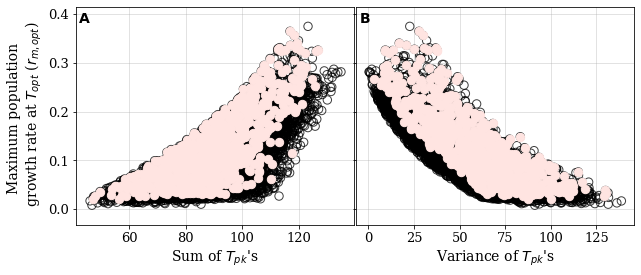

In [85]:
########## Fig. 4 ###############

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.set_title('A', weight="bold", fontsize=14, x=.03, y=.9,**csfont) 
ax.scatter(T_pk_sums,r_opt_vec[:,0], 
           s=70, alpha=0.75, facecolors='none', edgecolors = 'k')
ax.scatter(T_pk_sums[np.where(r_opt_vec[:,1] == 1)],r_opt_vec[np.where(r_opt_vec[:,1] == 1),0], 
           color = 'mistyrose', s=70, alpha=1)
ax.set_xlabel(r"Sum of $T_{pk}$'s", fontsize=14)
ax.set_ylabel('Maximum population \n growth rate at $T_{opt}$ ($r_{m,opt}$)', fontsize=14);
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13)

ax = fig.add_subplot(122)
ax.set_title('B', weight="bold", fontsize=14, x=.03, y=.9,**csfont); 
ax.scatter(T_pk_vars,r_opt_vec[:,0], 
           s=70, alpha=0.75, facecolors='none', edgecolors = 'k')
ax.scatter(T_pk_vars[np.where(r_opt_vec[:,1] == 1)],r_opt_vec[np.where(r_opt_vec[:,1] == 1),0], 
           color = 'mistyrose', s=70, alpha=1)
ax.set_xlabel(r"Variance of $T_{pk}$'s", fontsize=14);
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13)
ax.axes.yaxis.set_ticklabels([])

plt.subplots_adjust(wspace=0.01, hspace=.00)

plt.savefig('../results/TherMM_grad.pdf', bbox_inches='tight')

## Sensitivity of the results to the parametrisation of fecundity loss rate ($\kappa$)

Fecundity typically declines over time, which can have significant impacts on the lifetime reproduction of individuals and therefore fitness. The rate at which fecundity declines with age ($\kappa$) may be temperature-dependent, but there appears to be practically no exisiting data on this for arthropods. Therefore, here we quantify the sensitivity of our theoretical predictions to changes in parametrisation of baseline fecundity loss rate (the normalisation constant $\kappa_0$). Specifically, we re-evaluate our trait sensitivity analyses, as well as our calculation of selection gradient by varying $\kappa_0$ across two extreme values, around the value we have used to generate the main results (0.1).

Here's what changing $\kappa_0$ does (qualitatively) to the shape of the fecundity curve at any given temperature:  

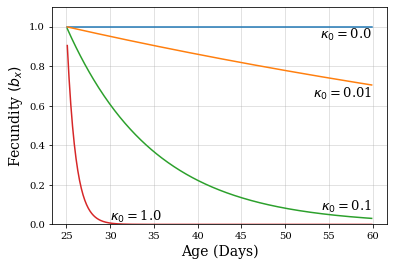

In [86]:
fig = plt.figure(); ax = fig.add_subplot(111)
b_x_lam = lambdify((b_max, kappa, alpha, x), b_x, np) #use lambidify to speed up

kap_range = [0.0,0.01,0.1,1.0]

ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[0], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), 1, r'$\kappa_0 = $'+ str(kap_range[0]), horizontalalignment = "right", 
        verticalalignment = "top", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[1], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), .7, r'$\kappa_0 = $'+ str(kap_range[1]), horizontalalignment = "right", 
        verticalalignment = "top", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[2], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), 0.05, r'$\kappa_0 = $'+ str(kap_range[2]), horizontalalignment = "right", 
        verticalalignment = "bottom", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[3], alp_par, x_vec[x_vec>alp_par]));
ax.text(30, 0, r'$\kappa_0 = $'+ str(kap_range[3]), horizontalalignment = "left", 
        verticalalignment = "bottom", fontsize = 13);
ax.set_xlabel('Age (Days)', fontsize=14);
ax.set_ylim([0,b_max_par*1.1]);
ax.set_ylabel('Fecundity $(b_x)$', fontsize=14)
plt.savefig('../results/kappa_plot.pdf', bbox_inches='tight')

Also, note that the TPC shape for $\kappa$ remains the same (for the two meangful extreme values of $\kappa_0$): 

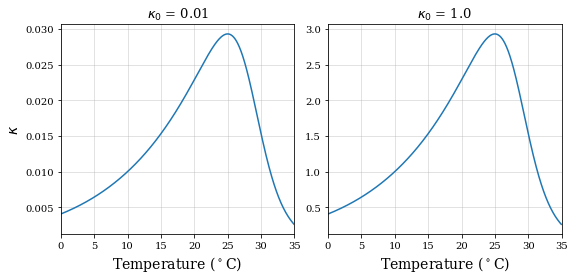

In [87]:
# kap_lo = min(kap_range)
kap_lo = kap_range[1]
kap_hi = max(kap_range)

kap_vec_lo = B_lam(kap_lo,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
kap_vec_hi = B_lam(kap_hi,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(121)

ax.plot(T_vec-273.15, kap_vec_lo);
ax.set_xlim([0,35])
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel(r'$\kappa$', fontsize=14)
ax.set_title(r'$\kappa_0$ = ' + str(kap_lo), fontsize=13) 

ax = fig.add_subplot(122)

ax.plot(T_vec-273.15, kap_vec_hi);
ax.set_xlim([0,35])
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_title(r'$\kappa_0$ = ' + str(kap_hi), fontsize=13) ;
fig.tight_layout()

### Effect on the trait sensitivity results

First we re-evaluate the trait sensitivity analysis results. 

In [88]:
T_vec = 273.15+np.arange(0, 40, 0.05) #Vector of temperatures

alp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec = B_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec_lo = B_lam(kap_lo,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
kap_vec_hi = B_lam(kap_hi,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

dr_dkap_vec_lo = dr_dkap_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec_lo)
dr_dkap_vec_hi = dr_dkap_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec_hi)

dkap_dT_vec_lo =  dkap_dT_lam(kap_lo,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
dkap_dT_vec_hi =  dkap_dT_lam(kap_hi,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

dr_dkap_dT_vec_lo = dr_dkap_vec_lo * dkap_dT_vec_lo
dr_dkap_dT_vec_hi = dr_dkap_vec_hi * dkap_dT_vec_lo

dr_dT_vec_lo = dr_dbmax_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec_lo
dr_dT_A_vec_lo = dr_dbmax_dT_vec + dr_dz_dT_vec + dr_dkap_dT_vec_lo

dr_dT_vec_hi = dr_dbmax_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec_hi
dr_dT_A_vec_hi = dr_dbmax_dT_vec + dr_dz_dT_vec + dr_dkap_dT_vec_hi

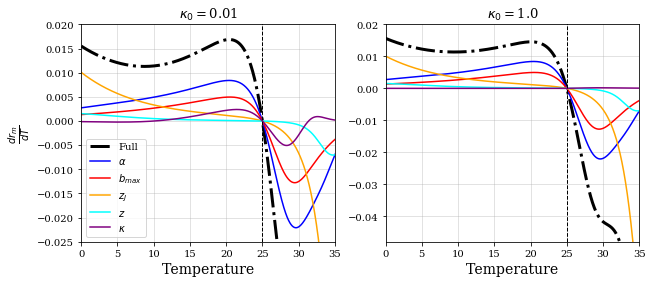

In [89]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.plot(T_vec-273.15,dr_dT_vec_lo, 'black', linewidth=3, linestyle='-.')
ax.set_title(r'$\kappa_0 = $'+str(kap_lo), fontsize=13) 
ax.plot(T_vec-273.15,dr_dalp_dT_vec, 'blue')
ax.plot(T_vec-273.15,dr_dbmax_dT_vec, 'red')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, 'orange')
ax.plot(T_vec-273.15,dr_dz_dT_vec, 'cyan')
ax.plot(T_vec-273.15,dr_dkap_dT_vec_lo, 'purple')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim(0,35)
ax.set_ylim(-0.025,.02)
ax.set_xlabel('Temperature', fontsize=14); 
ax.set_ylabel(r'$\frac{dr_m}{dT}$', fontsize=14);
plt.legend(['Full', r'$\alpha$', '$b_{max}$', '$z_J$', '$z$', r'$\kappa$'], loc='lower left') #Add kappa to legend if included in analysis

ax = fig.add_subplot(122)
ax.plot(T_vec-273.15,dr_dT_vec_hi, 'black', linewidth=3, linestyle='-.')
ax.set_title(r'$\kappa_0 = $'+str(kap_hi), fontsize=13) 
ax.plot(T_vec-273.15,dr_dalp_dT_vec, 'blue')
ax.plot(T_vec-273.15,dr_dbmax_dT_vec, 'red')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, 'orange')
ax.plot(T_vec-273.15,dr_dz_dT_vec, 'cyan')
ax.plot(T_vec-273.15,dr_dkap_dT_vec_hi, 'purple')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,35])
ax.set_ylim([-0.048,0.02])
ax.set_xlabel('Temperature', fontsize=14)

plt.savefig('../results/r_sens_kap.pdf', bbox_inches='tight')

As expected, in the case where baseline kappa ($\kappa_0$) is lower, maximum fecundity ($b_{max}$) becomes more important relative to $\kappa$, leaving the order of importance of the 5 traits the same as for the intermediate case ($\kappa_0 = 0.1$) upon which our main results are based.

### The selection gradients revisited 

Next we re-evaluate the $r_m$ TPC and selection gradient as above. We focus only on the dominant trait $\alpha$ because the order of the strengths of selection gradients is bound to remain  unchanged due to the unchanged order of trait sensitivity irrespective of the $\kappa_0$ value (previous section).  

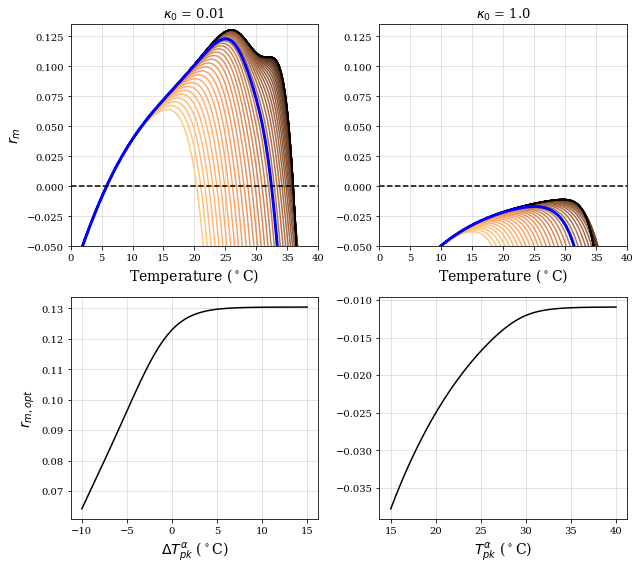

In [90]:
fig = plt.figure(figsize=(9, 8))

ax = fig.add_subplot(221)
ax.set_title(r'$\kappa_0$ = ' + str(kap_lo), fontsize=13) 
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('$r_m$', fontsize=14)

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec_lo, alp_vec)

r_opt_vec = ["NA"]*len(T_pk_mm)

colormap = plt.cm.copper_r 
ax.set_prop_cycle('color',[colormap(i) for i in np.linspace(0, 1, len(T_pk_mm))])

for i in range(len(T_pk_mm)):
    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec,zJ_mm_tmp_vec, z_vec, kap_vec_lo, alp_mm_tmp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
        
    ax.plot(T_vec-273.15, r_mm_tmp_vec)

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
plt.ylim(-0.05,0.135)
plt.xlim(0,40)

ax = fig.add_subplot(223)
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black');
ax.set_xlabel(r'$\Delta T_{pk}^\alpha$ ($^\circ$C)', fontsize=14); 
ax.set_ylabel('$r_{m, opt}$', fontsize=14)

ax = fig.add_subplot(222)
ax.set_title(r'$\kappa_0$ = ' + str(kap_hi), fontsize=13) 
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec_hi, alp_vec)

r_opt_vec = ["NA"]*len(T_pk_mm)

ax.set_prop_cycle('color',[colormap(i) for i in np.linspace(0, 1, len(T_pk_mm))])

for i in range(len(T_pk_mm)):

    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)
    
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec,zJ_mm_tmp_vec, z_vec, kap_vec_hi, alp_mm_tmp_vec)
        
    r_opt_vec[i] = max(r_mm_tmp_vec)
    
    ax.plot(T_vec-273.15, r_mm_tmp_vec)

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--");
plt.ylim(-0.05,0.135)
plt.xlim(0,40)

ax = fig.add_subplot(224)
ax.plot(T_pk_mm, r_opt_vec, 'black');
ax.set_xlabel(r'$T_{pk}^\alpha$ ($^\circ$C)', fontsize=14); 

fig.tight_layout()

Thus the selection gradient remains qualitatively unchanged, with overall $r_m$ lower when $\kappa$ is high, as expected.  